In [7]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import seaborn as sns 
from tqdm import tqdm


pd.options.display.max_columns = None
pd.options.display.max_rows = 100

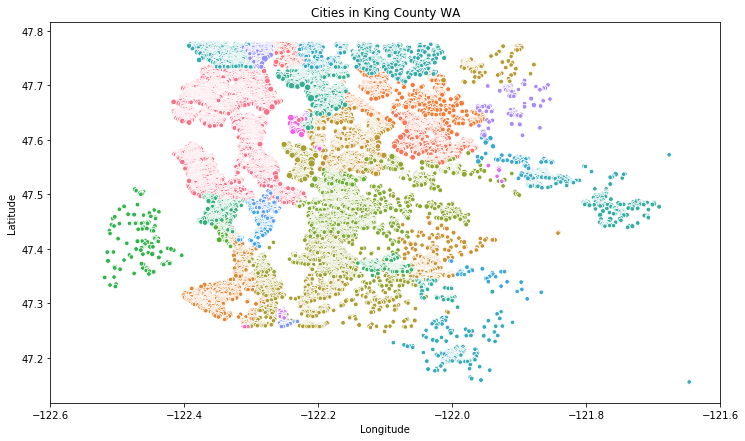

In [8]:
df = pd.read_csv('data/updated_housing_data.csv')
def create_city_scatter(df): 
    fig, ax = plt.subplots(figsize = (12,7))
    cmap = sns.cubehelix_palette(dark=.3, light=.6, as_cmap=True)

    sns.scatterplot(x = 'long', y = 'lat', data = df, hue = 'City', ax = ax, legend = None, size = 'price')
    ax.set_title('Cities in King County WA')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude') 
    ax.set_xlim(-122.6, -121.6)

create_city_scatter(df)

In [4]:
import folium
#%load_ext folium_magic

def colorize(sqft):
    '''This function creates a color code for sqft_lot15'''
    if (sqft < 10000):
        return 'pink'
    elif (sqft < 20000):
        return 'lightred'
    elif (sqft < 30000):
        return 'red'
    else:
        return 'darkred'
    
def create_folium_map(df):
    '''This function will create a folium map displaying sqft_lot15 and how it varies between urban 
    and rural areas'''
    df['color'] = df.sqft_lot15.apply(colorize)
    x_range = (df.long.min(), df.long.max())
    y_range = (df.lat.min(), df.lat.max())
    x_mid = sum(x_range)/len(x_range)
    y_mid = sum(y_range)/len(y_range)
    m = folium.Map(location=[y_mid, x_mid])
    for color in ['pink', 'lightred', 'red', 'darkred']:
        for i in df[df['color'] == color].sample(30).index:
            folium.Marker(location=[df.loc[i, 'lat'], df.loc[i, 'long']], 
                      popup='${}'.format(df.loc[i, 'price']), 
                      tooltip='Click to view price.',
                      icon=folium.Icon(color=color)).add_to(m)
    return m
        
create_folium_map(df)


100%|██████████| 21597/21597 [01:18<00:00, 276.07it/s]


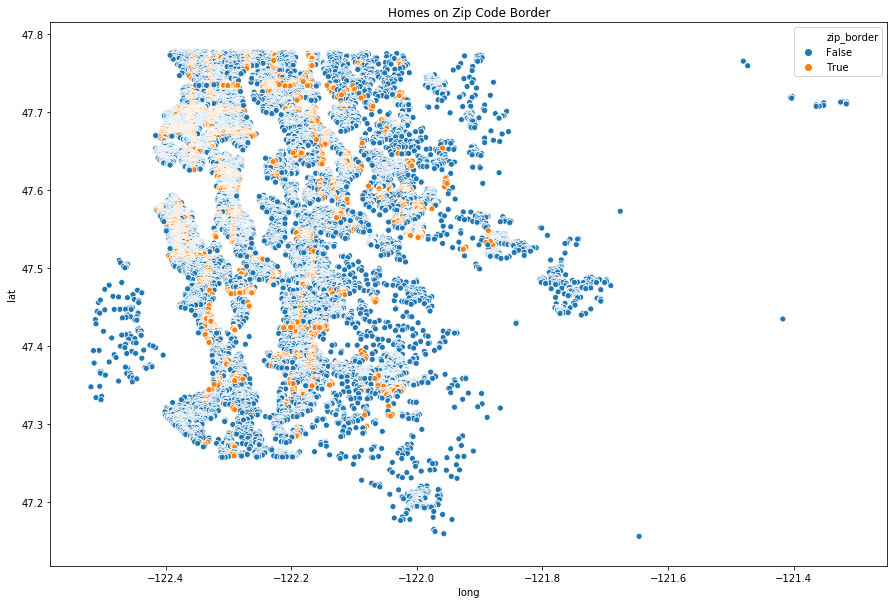

In [10]:
df['zip_border'] = 0
index=5
def sample_by_lat_long(lat, long, size=.01):
    return df[(df.lat > (lat-size)) & (df.lat < (lat+size)) & (df.long > (long-size)) & (df.long < (long+size))]

def possibly_on_border(index, df, area_size=0.01):
    neighbors = sample_by_lat_long(df.loc[index, 'lat'], df.loc[index, 'long'], area_size)
    return len(neighbors.zipcode.value_counts()) > 1

for i in tqdm(df.index):
    df.loc[i, 'zip_border'] = possibly_on_border(i, df, .005)

def show_city_borders(df):
    plt.figure(figsize=(15,10))
    sns.scatterplot(x='long', y='lat', hue='zip_border', data=df)
    plt.title('kings county homes')
    plt.legend()
    plt.title('Homes on Zip Code Border')
    plt.savefig('homes-on-zip-border.png')
    plt.show()
show_city_borders(df)